 15%|█▍        | 294/2000 [03:14<16:13,  1.75it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
100%|██████████| 2000/2000 [18:34<00:00,  1.79it/s]
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.1082 - loss: 3.5996 - val_accuracy: 0.0875 - val_loss: 3.7106
Epoch 2/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.3374 - loss: 2.3974 - val_accuracy: 0.2050 - val_loss: 3.4796
Epoch 3/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.4353 - loss: 1.9816 - val_accuracy: 0.2575 - val_loss: 3.2059
Epoch 4/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.4721 - loss: 1.7336 - val_accuracy: 0.2825 - val_loss: 2.9355
Epoch 5/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.5036 - loss: 1.6771 - val_accuracy: 0.3025 - val_loss: 2.6021
Epoch 6/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.5408 - loss: 1.5356 - val_accuracy: 0.2725 - val_loss: 2.5671
Epoch 7/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5897 - loss: 1.4297 - val_accuracy: 0.3150 - val_loss: 2.2704
Epoch 8/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.6314 - loss: 1.2436 - val_accuracy: 0.3350 - v

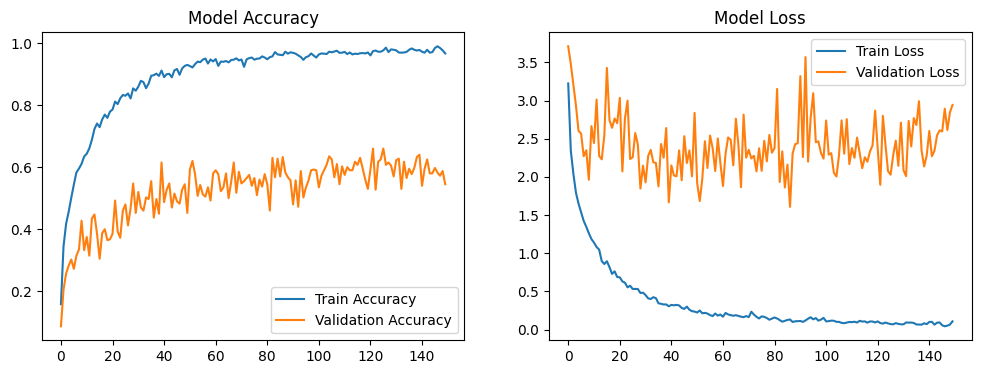

Training Accuracy: 0.8744
Validation Accuracy: 0.5450
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


Classification Report:

              precision    recall  f1-score   support

           0       0.45      0.83      0.59         6
           1       0.38      1.00      0.55         6
           2       0.83      0.56      0.67         9
           3       1.00      0.38      0.56        13
           4       0.83      0.45      0.59        11
           5       0.75      0.25      0.38        12
           6       0.71      0.42      0.53        12
           7       1.00      0.67      0.80         6
           8       0.80      0.40      0.53        10
           9       0.50      0.33      0.40         6
          10       0.40      0.80      0.53         5
          11       0.56      0.83      0.67        12
          12       0.67      0.67      0.67         9
          13       0.62      0.83      0.71         6
          14       0.50      0.50      0.50         6
          15       0.56      0.36      0.43        14
          16       0.50      0.11      0.18         9
  

In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Load ESC-50 metadata
esc50_csv_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/ESC-50-master/meta/esc50.csv"
esc50_audio_dir = "/content/drive/MyDrive/Colab Notebooks/Dataset/ESC-50-master/audio"

metadata = pd.read_csv(esc50_csv_path)

def extract_features(file_path, sr=22050, n_mfcc=40, target_size=(128, 128)):
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return None
    try:
        y, sr = librosa.load(file_path, sr=sr, duration=3.0)

        # Skip very short audio
        if len(y) < sr * 0.1:
            print(f"Skipping short audio file: {file_path}")
            return None

        # Compute MFCC
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

        # Compute Tonnetz
        tonnetz = librosa.feature.tonnetz(y=y, sr=sr)

        # Resize both to (128, 128)
        mfcc_resized = tf.image.resize(np.expand_dims(mfcc, axis=-1), target_size).numpy()
        tonnetz_resized = tf.image.resize(np.expand_dims(tonnetz, axis=-1), target_size).numpy()

        # Stack MFCC and Tonnetz along the channel axis
        stacked_features = np.dstack((mfcc_resized, tonnetz_resized))

        return stacked_features
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

X, y = [], []
for i in tqdm(range(len(metadata))):
    file_path = os.path.join(esc50_audio_dir, metadata.loc[i, "filename"])
    label = metadata.loc[i, "target"]
    if not os.path.exists(file_path):
        print(f"Skipping missing file: {file_path}")
        continue
    features = extract_features(file_path)
    if features is not None:
        X.append(features)
        y.append(label)

if len(X) == 0:
    raise RuntimeError("No valid audio files were processed. Check dataset paths and file integrity.")

X = np.array(X)
y = to_categorical(y, num_classes=50)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN Model using MFCC+Tonnetz
class ESC50ModelTrainer:
    def __init__(self, input_shape=(128, 128, 2), num_classes=50):
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.model = self.build_model()

    def build_model(self):
        model = Sequential()
        model.add(Conv2D(32, kernel_size=(2, 2), strides=(1, 1), padding='same', input_shape=self.input_shape))
        model.add(BatchNormalization())
        model.add(tf.keras.layers.Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(32, kernel_size=(2, 2), strides=(1, 1), padding='same'))
        model.add(BatchNormalization())
        model.add(tf.keras.layers.Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Dropout(0.25))

        model.add(Conv2D(64, kernel_size=(2, 2), strides=(1, 1), padding='same'))
        model.add(BatchNormalization())
        model.add(tf.keras.layers.Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(64, kernel_size=(2, 2), strides=(1, 1), padding='same'))
        model.add(BatchNormalization())
        model.add(tf.keras.layers.Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Dropout(0.25))

        model.add(GlobalAveragePooling2D())
        model.add(Dense(1024))
        model.add(BatchNormalization())
        model.add(tf.keras.layers.Activation('relu'))
        model.add(Dense(self.num_classes, activation='softmax'))

        return model

    def compile_model(self):
        self.model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

trainer = ESC50ModelTrainer()
trainer.compile_model()
model = trainer.model

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

from sklearn.metrics import classification_report, accuracy_score

# Evaluate model on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Validation Accuracy: {test_accuracy:.4f}")

# Get predictions
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=[str(i) for i in range(50)])

# Print classification report
print("\nClassification Report:\n")
print(report)

# Display final test accuracy
print(f"Final Test Accuracy (from classification report): {accuracy_score(y_true_classes, y_pred_classes):.4f}")

# Save the trained ESC-50 model
model.save("/content/drive/MyDrive/Colab Notebooks/Dataset/ESC-50-master/CNN2_MFCC_Tonnetz_esc50_model.h5")
print("ESC-50 trained model saved successfully!")



UrbanSound8K model successfully built!
Processing UrbanSound8K dataset...


  0%|          | 0/8732 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=876
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=438
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=219
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=110
  warnings.warn(
  0%|          | 9/8732 [00:13<2:09:08,  1.13it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=894
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=4

Skipping short audio file: /content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio/fold3/151359-1-2-0.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=606
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=76
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=38
  warnings.warn(
 24%|██▍       | 2124/8732 [26:52<50:24,  2.19it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=972
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=486
  warnings.warn(
 25%|██▍       | 2146/8732 [27:09<1:12:15,  1.52it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal

Skipping short audio file: /content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio/fold2/17307-1-0-0.wav


 41%|████      | 3590/8732 [45:10<2:13:14,  1.55s/it]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=989
  warnings.warn(
 41%|████      | 3595/8732 [45:14<1:12:55,  1.17it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=879
  warnings.warn(
 41%|████      | 3596/8732 [45:14<1:09:14,  1.24it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=905
  warnings.warn(
 41%|████      | 3599/8732 [45:17<1:02:24,  1.37it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=907
  warnings.warn(
 41%|████▏     | 3604/8732 [45:19<49:08,  1.74it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input 

Skipping short audio file: /content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio/fold1/87275-1-1-0.wav


 95%|█████████▌| 8329/8732 [1:44:51<02:16,  2.95it/s]

Skipping short audio file: /content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio/fold1/87275-1-2-0.wav
Skipping short audio file: /content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio/fold1/87275-1-3-0.wav


 95%|█████████▌| 8330/8732 [1:44:51<02:01,  3.32it/s]

Skipping short audio file: /content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio/fold1/87275-1-4-0.wav


 95%|█████████▌| 8338/8732 [1:44:56<04:50,  1.36it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=573
  warnings.warn(
 97%|█████████▋| 8435/8732 [1:46:14<03:35,  1.38it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=998
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=499
  warnings.warn(
 97%|█████████▋| 8462/8732 [1:46:33<03:02,  1.48it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=768
  warnings.warn(
 98%|█████████▊| 8535/8732 [1:47:31<02:36,  1.26it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=719
  warnings.warn(
 98%|████████

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 321s 1s/step - accuracy: 0.2507 - loss: 2.2578 - val_accuracy: 0.4828 - val_loss: 2.0953
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 315s 1s/step - accuracy: 0.4829 - loss: 1.5756 - val_accuracy: 0.5498 - val_loss: 1.6332
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 319s 1s/step - accuracy: 0.5465 - loss: 1.3491 - val_accuracy: 0.5968 - val_loss: 1.2392
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 330s 1s/step - accuracy: 0.5948 - loss: 1.2401 - val_accuracy: 0.6403 - val_loss: 1.1182
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 307s 1s/step - accuracy: 0.6292 - loss: 1.1369 - val_accuracy: 0.6541 - val_loss: 1.0645
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.6479 - loss: 1.0653 - val_accuracy: 0.6747 - val_loss: 1.0405
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 323s 1s/step - accuracy: 0.6845 - loss: 0.9754 - val_accuracy: 0.6901 - val_loss: 0.9645
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 317s 1s/step - accuracy: 0.6860 - loss: 0.9592 - val_accu

Fine-tuned UrbanSound8K model saved successfully!


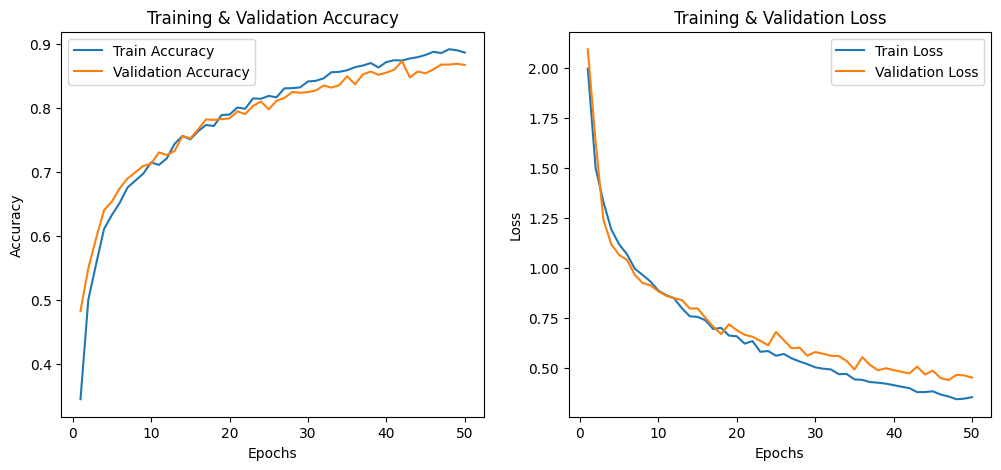

In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# ------------------- Load Pre-trained ESC-50 Model -------------------
CNN2_MFCC_Tonnetz_esc50_model_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/ESC-50-master/CNN2_MFCC_Tonnetz_esc50_model.h5"

if not os.path.exists(CNN2_MFCC_Tonnetz_esc50_model_path):
    raise FileNotFoundError(f"ESC-50 trained model not found at: {CNN2_MFCC_Tonnetz_esc50_model_path}")

base_model = load_model(CNN2_MFCC_Tonnetz_esc50_model_path)

# Define an explicit input layer (same as ESC-50 input shape)
input_layer = Input(shape=(128, 128, 2))  # (MFCC + Tonnetz)

# Pass the input through the pre-trained model
x = base_model(input_layer, training=False)  # Freezes pre-trained layers

# Modify the last layers for UrbanSound8K (10 classes)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
out = Dense(10, activation='softmax')(x)  # 10 classes for UrbanSound8K

# Create the new model
urban_model = Model(inputs=input_layer, outputs=out)

# Compile the fine-tuned model
urban_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

print("UrbanSound8K model successfully built!")

# ------------------- Process UrbanSound8K Dataset -------------------

urbansound_csv = "/content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv"
urbansound_audio_dir = "/content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio"

urbansound_metadata = pd.read_csv(urbansound_csv)

def extract_features(file_path, sr=22050, n_mfcc=40, target_size=(128, 128)):
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return None
    try:
        y, sr = librosa.load(file_path, sr=sr, duration=3.0)

        # Skip very short audio
        if len(y) < sr * 0.1:
            print(f"Skipping short audio file: {file_path}")
            return None

        # Compute MFCC
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

        # Compute Tonnetz
        tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr)

        # Resize both to (128, 128)
        mfcc_resized = tf.image.resize(np.expand_dims(mfcc, axis=-1), target_size).numpy()
        tonnetz_resized = tf.image.resize(np.expand_dims(tonnetz, axis=-1), target_size).numpy()

        # Stack MFCC and Tonnetz along the channel axis
        stacked_features = np.dstack((mfcc_resized, tonnetz_resized))

        return stacked_features
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

# ------------------- Load and Process UrbanSound8K Dataset -------------------

X_urban, y_urban = [], []
print("Processing UrbanSound8K dataset...")

for i in tqdm(range(len(urbansound_metadata))):
    file_path = os.path.join(urbansound_audio_dir, f"fold{urbansound_metadata.loc[i, 'fold']}", urbansound_metadata.loc[i, "slice_file_name"])
    label = urbansound_metadata.loc[i, "classID"]
    features = extract_features(file_path)

    if features is not None:
        X_urban.append(features)
        y_urban.append(label)

if len(X_urban) == 0:
    raise RuntimeError("No valid UrbanSound8K audio files processed.")

# Convert dataset to NumPy arrays
X_urban = np.array(X_urban)
y_urban = to_categorical(y_urban, num_classes=10)

# Split dataset into training and test sets
X_train_urban, X_test_urban, y_train_urban, y_test_urban = train_test_split(X_urban, y_urban, test_size=0.2, random_state=42)

# ------------------- Fine-Tune the Model -------------------
history_urban = urban_model.fit(X_train_urban, y_train_urban, epochs=50, batch_size=32, validation_data=(X_test_urban, y_test_urban))

# Save the fine-tuned model
urban_model.save("/content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/urbansound8k_cnn_model.h5")
print("Fine-tuned UrbanSound8K model saved successfully!")

# ------------------- Plot Training Results -------------------
import matplotlib.pyplot as plt

def plot_training_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'tab:blue', label='Train Accuracy')
    plt.plot(epochs, val_acc, 'tab:orange', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'tab:blue', label='Train Loss')
    plt.plot(epochs, val_loss, 'tab:orange', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training & Validation Loss')
    plt.legend()

    plt.show()

# Call the function to plot results
plot_training_results(history_urban)


In [ ]:
# Evaluate model on training data
train_loss, train_accuracy = urban_model.evaluate(X_train_urban, y_train_urban, verbose=0)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate model on test data
test_loss, test_accuracy = urban_model.evaluate(X_test_urban, y_test_urban, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predictions
y_pred_probs = urban_model.predict(X_test_urban)  # Get probability outputs
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true_classes = np.argmax(y_test_urban, axis=1)  # Convert one-hot encoded labels to class labels


from sklearn.metrics import precision_score, recall_score, f1_score


# Compute precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

# Print evaluation metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


# Ensure the import is available
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Debugging step: Check class labels before computing classification report
print("y_true_classes:", type(y_true_classes), y_true_classes.shape)
print("y_pred_classes:", type(y_pred_classes), y_pred_classes.shape)

# Compute classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=[str(i) for i in range(10)])

print("\nClassification Report:\n")
print(report)
print(f"Final Test Accuracy (from classification report): {accuracy_score(y_true_classes, y_pred_classes):.4f}")



Training Accuracy: 0.9181
Test Accuracy: 0.8677
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 227ms/step
Precision: 0.8710
Recall: 0.8677
F1 Score: 0.8674
y_true_classes: <class 'numpy.ndarray'> (1746,)
y_pred_classes: <class 'numpy.ndarray'> (1746,)

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       215
           1       0.92      0.86      0.89        79
           2       0.78      0.81      0.79       178
           3       0.90      0.78      0.83       209
           4       0.84      0.89      0.86       212
           5       0.83      0.91      0.87       204
           6       0.88      0.94      0.91        68
           7       0.95      0.91      0.93       191
           8       0.95      0.87      0.91       170
           9       0.87      0.80      0.83       220

    accuracy                           0.87      1746
   macro avg       0.88      0.87      0.87      1746
weighted avg       0.87      0.87  

UrbanSound8K model successfully built!
Processing UrbanSound8K dataset...


  0%|          | 0/8732 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=876
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=438
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=219
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=110
  warnings.warn(
  0%|          | 9/8732 [00:28<2:30:42,  1.04s/it]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=894
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=4

Skipping short audio file: /content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio/fold3/151359-1-2-0.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=606
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=76
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=38
  warnings.warn(
 24%|██▍       | 2124/8732 [24:09<48:32,  2.27it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=972
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=486
  warnings.warn(
 25%|██▍       | 2146/8732 [24:25<1:09:01,  1.59it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal

Skipping short audio file: /content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio/fold2/17307-1-0-0.wav


 41%|████      | 3590/8732 [40:01<52:19,  1.64it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=989
  warnings.warn(
 41%|████      | 3595/8732 [40:05<59:44,  1.43it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=879
  warnings.warn(
 41%|████      | 3596/8732 [40:05<1:02:06,  1.38it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=905
  warnings.warn(
 41%|████      | 3599/8732 [40:07<53:30,  1.60it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=907
  warnings.warn(
 41%|████▏     | 3604/8732 [40:10<50:00,  1.71it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal

Skipping short audio file: /content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio/fold1/87275-1-1-0.wav
Skipping short audio file: /content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio/fold1/87275-1-2-0.wav


 95%|█████████▌| 8329/8732 [1:31:15<02:23,  2.82it/s]

Skipping short audio file: /content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio/fold1/87275-1-3-0.wav


 95%|█████████▌| 8330/8732 [1:31:16<02:05,  3.19it/s]

Skipping short audio file: /content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio/fold1/87275-1-4-0.wav


 95%|█████████▌| 8338/8732 [1:31:21<03:57,  1.66it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=573
  warnings.warn(
 97%|█████████▋| 8435/8732 [1:32:23<03:08,  1.57it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=998
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=499
  warnings.warn(
 97%|█████████▋| 8462/8732 [1:32:40<02:35,  1.74it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=768
  warnings.warn(
 98%|█████████▊| 8535/8732 [1:33:32<02:38,  1.25it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=719
  warnings.warn(
 98%|████████

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - accuracy: 0.2072 - loss: 2.3517 - val_accuracy: 0.4685 - val_loss: 2.1110
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.4626 - loss: 1.5951 - val_accuracy: 0.5223 - val_loss: 1.6908
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.5317 - loss: 1.3812 - val_accuracy: 0.5533 - val_loss: 1.2851
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 274s 1s/step - accuracy: 0.5661 - loss: 1.2886 - val_accuracy: 0.5825 - val_loss: 1.2088
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.6025 - loss: 1.1699 - val_accuracy: 0.6271 - val_loss: 1.1108
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 312s 1s/step - accuracy: 0.6192 - loss: 1.1320 - val_accuracy: 0.6340 - val_loss: 1.0519
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 281s 1s/step - accuracy: 0.6361 - loss: 1.0674 - val_accuracy: 0.6415 - val_loss: 1.0614
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.6532 - loss: 1.0312 - val_accu

Fine-tuned UrbanSound8K model saved successfully!


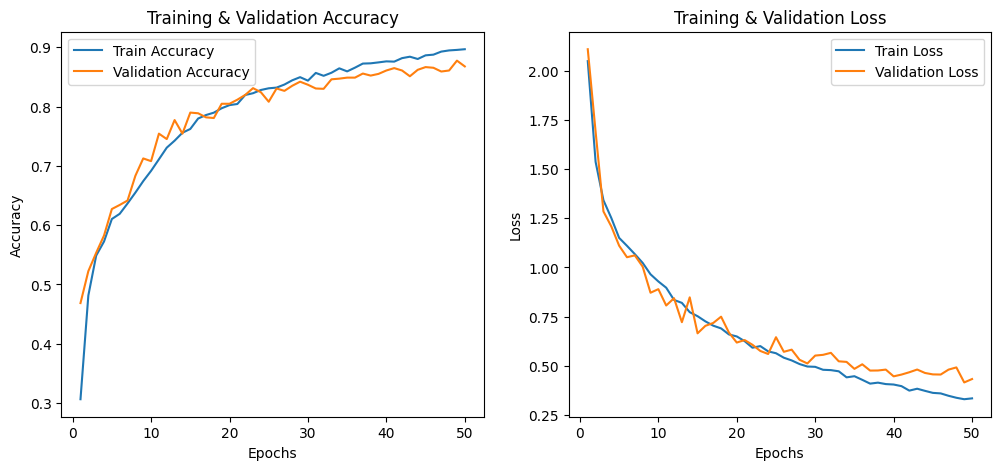

NameError: name 'history' is not defined

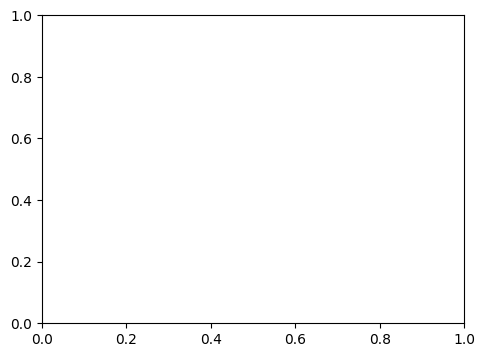

In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# ------------------- Load Pre-trained ESC-50 Model -------------------
CNN2_MFCC_Tonnetz_esc50_model_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/ESC-50-master/CNN2_MFCC_Tonnetz_esc50_model.h5"

if not os.path.exists(CNN2_MFCC_Tonnetz_esc50_model_path):
    raise FileNotFoundError(f"ESC-50 trained model not found at: {CNN2_MFCC_Tonnetz_esc50_model_path}")

base_model = load_model(CNN2_MFCC_Tonnetz_esc50_model_path)

# Define an explicit input layer (same as ESC-50 input shape)
input_layer = Input(shape=(128, 128, 2))  # (MFCC + Tonnetz)

# Pass the input through the pre-trained model
x = base_model(input_layer, training=False)  # Freezes pre-trained layers

# Modify the last layers for UrbanSound8K (10 classes)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
out = Dense(10, activation='softmax')(x)  # 10 classes for UrbanSound8K

# Create the new model
urban_model = Model(inputs=input_layer, outputs=out)

# Compile the fine-tuned model
urban_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

print("UrbanSound8K model successfully built!")

# ------------------- Process UrbanSound8K Dataset -------------------

urbansound_csv = "/content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv"
urbansound_audio_dir = "/content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio"

urbansound_metadata = pd.read_csv(urbansound_csv)

def extract_features(file_path, sr=22050, n_mfcc=40, target_size=(128, 128)):
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return None
    try:
        y, sr = librosa.load(file_path, sr=sr, duration=3.0)

        # Skip very short audio
        if len(y) < sr * 0.1:
            print(f"Skipping short audio file: {file_path}")
            return None

        # Compute MFCC
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

        # Compute Tonnetz
        tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr)

        # Resize both to (128, 128)
        mfcc_resized = tf.image.resize(np.expand_dims(mfcc, axis=-1), target_size).numpy()
        tonnetz_resized = tf.image.resize(np.expand_dims(tonnetz, axis=-1), target_size).numpy()

        # Stack MFCC and Tonnetz along the channel axis
        stacked_features = np.dstack((mfcc_resized, tonnetz_resized))

        return stacked_features
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

# ------------------- Load and Process UrbanSound8K Dataset -------------------

X_urban, y_urban = [], []
print("Processing UrbanSound8K dataset...")

for i in tqdm(range(len(urbansound_metadata))):
    file_path = os.path.join(urbansound_audio_dir, f"fold{urbansound_metadata.loc[i, 'fold']}", urbansound_metadata.loc[i, "slice_file_name"])
    label = urbansound_metadata.loc[i, "classID"]
    features = extract_features(file_path)

    if features is not None:
        X_urban.append(features)
        y_urban.append(label)

if len(X_urban) == 0:
    raise RuntimeError("No valid UrbanSound8K audio files processed.")

# Convert dataset to NumPy arrays
X_urban = np.array(X_urban)
y_urban = to_categorical(y_urban, num_classes=10)

# Split dataset into training and test sets
X_train_urban, X_test_urban, y_train_urban, y_test_urban = train_test_split(X_urban, y_urban, test_size=0.2, random_state=42)

# ------------------- Fine-Tune the Model -------------------
history_urban = urban_model.fit(X_train_urban, y_train_urban, epochs=50, batch_size=32, validation_data=(X_test_urban, y_test_urban))

# Save the fine-tuned model
urban_model.save("/content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/urbansound8k_cnn_model.h5")
print("Fine-tuned UrbanSound8K model saved successfully!")

# ------------------- Plot Training Results -------------------
import matplotlib.pyplot as plt

def plot_training_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'tab:blue', label='Train Accuracy')
    plt.plot(epochs, val_acc, 'tab:orange', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'tab:blue', label='Train Loss')
    plt.plot(epochs, val_loss, 'tab:orange', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training & Validation Loss')
    plt.legend()

    plt.show()

# Call the function to plot results
plot_training_results(history_urban)


# ============================
# Plot Training History
# ============================
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylim(0, 1)
plt.title("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.ylim(0, 2)
plt.title("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ============================
# Save Training History as .npy
# ============================
result_dir = "/content/drive/MyDrive/Colab Notebooks/Models/Result"
np.save(os.path.join(result_dir, "cnn2_MFCC_TZ_train_acc.npy"), history_urban.history['accuracy'])
np.save(os.path.join(result_dir, "cnn2_MFCC_TZ_val_acc.npy"), history_urban.history['val_accuracy'])
np.save(os.path.join(result_dir, "cnn2_MFCC_TZ_train_loss.npy"), history_urban.history['loss'])
np.save(os.path.join(result_dir, "cnn2_MFCC_TZ_val_loss.npy"), history_urban.history['val_loss'])

print("CNN1 training history saved!")


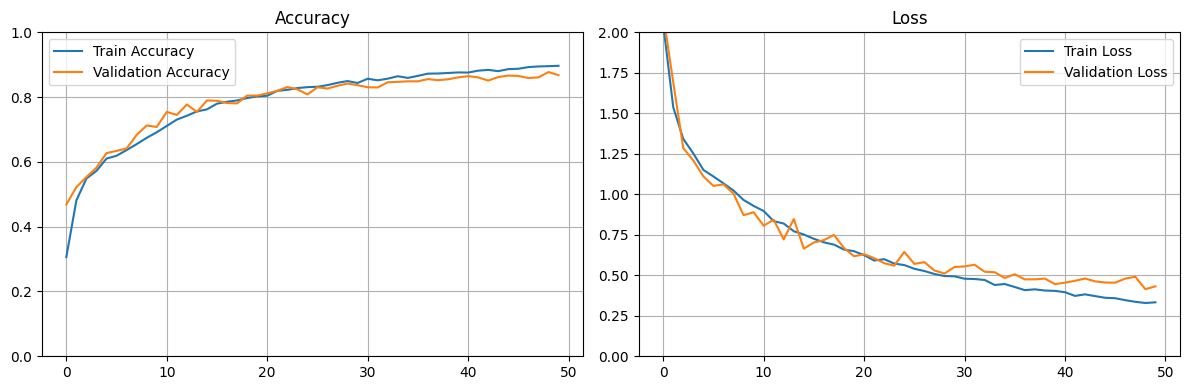

CNN1 training history saved!


In [ ]:
# Plot Training History
# ============================
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_urban.history['accuracy'], label='Train Accuracy')
plt.plot(history_urban.history['val_accuracy'], label='Validation Accuracy')
plt.ylim(0, 1)
plt.title("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_urban.history['loss'], label='Train Loss')
plt.plot(history_urban.history['val_loss'], label='Validation Loss')
plt.ylim(0, 2)
plt.title("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ============================
# Save Training History as .npy
# ============================
result_dir = "/content/drive/MyDrive/Colab Notebooks/Models/Result"
np.save(os.path.join(result_dir, "cnn2_MFCC_TZ_train_acc.npy"), history_urban.history['accuracy'])
np.save(os.path.join(result_dir, "cnn2_MFCC_TZ_val_acc.npy"), history_urban.history['val_accuracy'])
np.save(os.path.join(result_dir, "cnn2_MFCC_TZ_train_loss.npy"), history_urban.history['loss'])
np.save(os.path.join(result_dir, "cnn2_MFCC_TZ_val_loss.npy"), history_urban.history['val_loss'])

print("CNN1 training history saved!")
